## Bias Frames

In [1]:
# start by importing the necessities
import numpy as np
from astropy.io import fits
from matplotlib import pyplot as plt

In [2]:
import glob

biases = glob.glob('/Users/wanyan/Desktop/Astro/229/M82/biases/*.fits')
biases

['/Users/wanyan/Desktop/Astro/229/M82/biases/obj0004.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/biases/obj0008.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/biases/obj0009.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/biases/obj0005.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/biases/obj0075.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/biases/obj0080.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/biases/obj0079.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/biases/obj0002.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/biases/obj0003.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/biases/obj0078.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/biases/obj0081.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/biases/obj0074.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/biases/obj0077.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/biases/obj0082.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/biases/obj0083.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/biases/obj0001.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/bi

In [3]:
fits.getheader(biases[0])

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1056 / Axis length                                    
NAXIS2  =                 1024 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
BSCALE  =           1.000000E0 / REAL = TAPE*BSCALE + BZERO                     
BZERO   =           3.276800E4 /                                                
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 1999' / FITS file originator        
DATE    = '2024-02-15T01:42:35' / Date FITS file was generated                  
IRAF-TLM= '2024-02-15T01:41:42' / Time of last modification                     
OBJECT  = 'Bias    '           / Name of the object observed                    
OBSERVAT= 'MCDONALD         

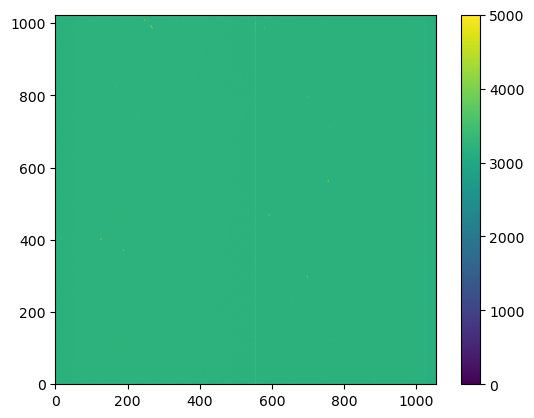

In [4]:
bias1 = fits.getdata(biases[0])
plt.imshow(bias1, origin='lower', vmin=0, vmax=5000)
plt.colorbar()

In [5]:
med_bias1 = np.median(bias1)
med_bias1

3212.0

In [6]:
std_bias1 = np.std(bias1)
std_bias1

22.05385730618298

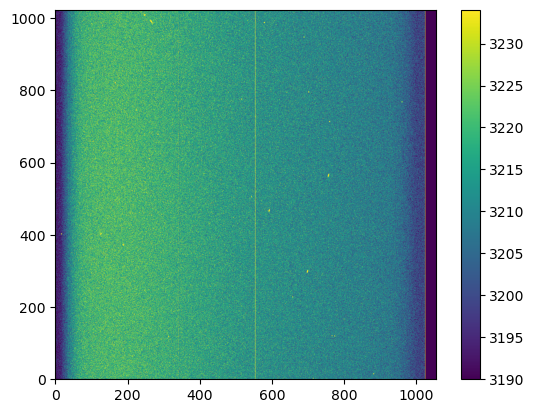

In [7]:
plt.imshow(bias1, origin='lower', vmin=(med_bias1-std_bias1), vmax=(med_bias1+std_bias1))
plt.colorbar()

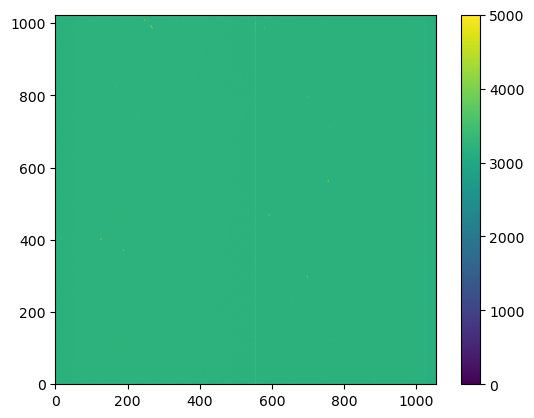

In [8]:
# Other bias frame
bias2 = fits.getdata(biases[1])
plt.imshow(bias1, origin='lower', vmin=0, vmax=5000)
plt.colorbar()

In [9]:
med_bias2 = np.median(bias2)
med_bias2

3212.0

In [10]:
std_bias2 = np.std(bias2)
std_bias2

20.971387170410477

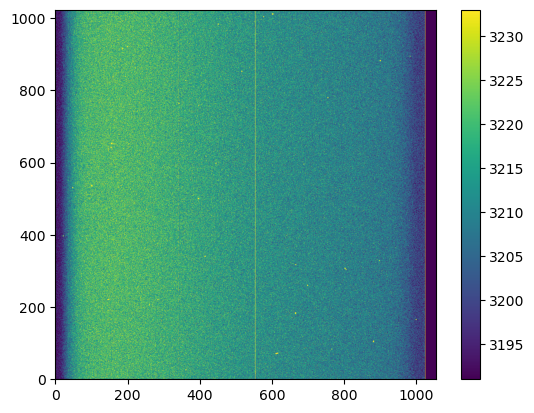

In [11]:
plt.imshow(bias2, origin='lower', vmin=(med_bias2-std_bias2), vmax=(med_bias2+std_bias2))
plt.colorbar()

In [12]:
bias_timestream = [fits.getdata(x) for x in biases]

In [13]:
type(bias_timestream)

list

In [14]:
# average of the bias frames
mean_bias = np.mean(bias_timestream, axis=0)
# median
median_bias = np.median(bias_timestream, axis=0)

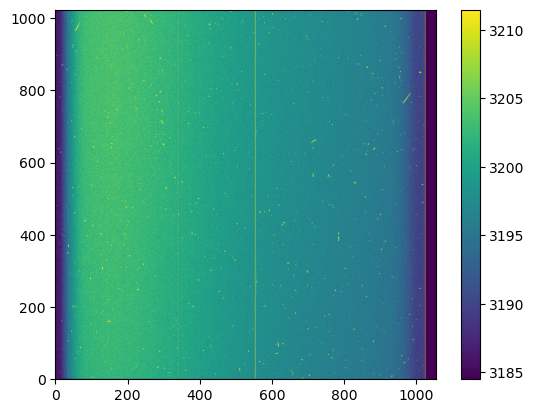

In [15]:
# mean-combined
plt.imshow(mean_bias, origin='lower', vmin=(mean_bias.mean()-mean_bias.std()), vmax=(mean_bias.mean()+mean_bias.std()))
plt.colorbar()

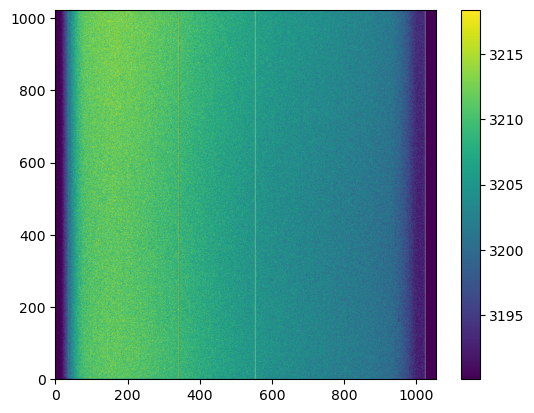

In [16]:
# median-combined
plt.imshow(median_bias, origin='lower', vmin=(median_bias.mean()-median_bias.std()), vmax=(median_bias.mean()+median_bias.std()))
plt.colorbar()

## Bias Strip

In [17]:
my_file = fits.open('/Users/wanyan/Desktop/Astro/229/M82/obj0063.fits')

data = my_file[0].data
header = my_file[0].header

In [18]:
data.shape

(1024, 1056)

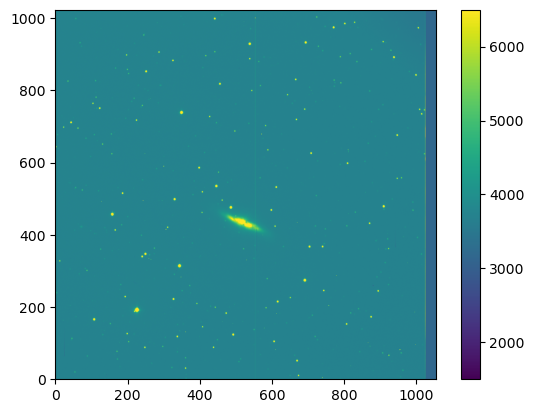

In [19]:
plt.imshow(data, origin='lower', vmin=1500, vmax=6500)
plt.colorbar()

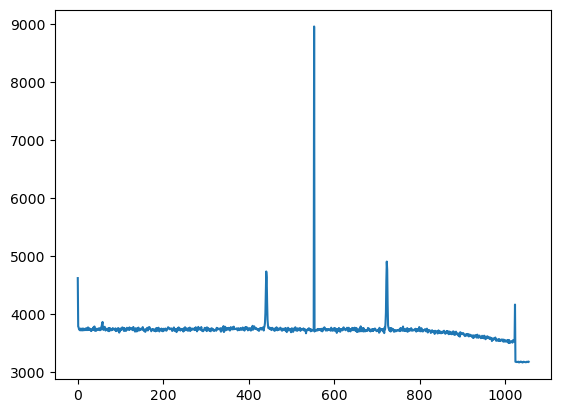

In [20]:
plt.plot(data[1000,:])

(2750.0, 5000.0)

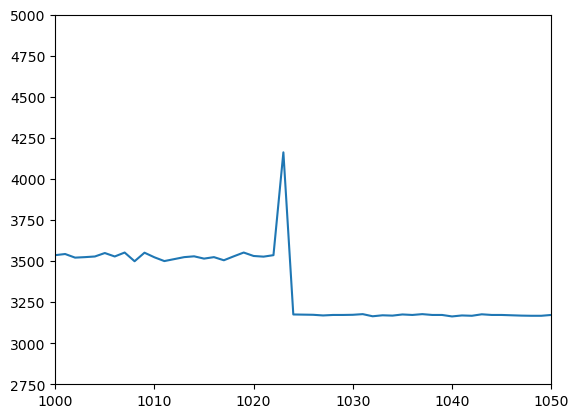

In [21]:
plt.plot(data[1000,:])
plt.xlim([1000,1050])
plt.ylim([2750,5000])

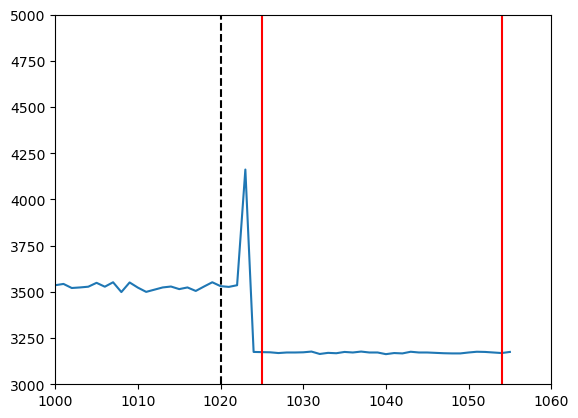

In [22]:
# plot the data
plt.plot(data[1000,:])
plt.xlim([1000,1060])
plt.ylim([3000,5000])

# visualize our threshold values
# the end of the data
plt.plot([1020,1020], [3000,9000], color='black', linestyle='dashed')
# the bias strip
plt.plot([1025,1025], [3000,9000], color='red')
plt.plot([1054,1054], [3000,5000], color='red')

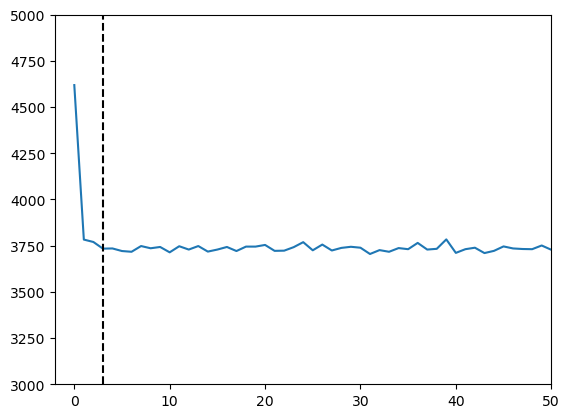

In [23]:
# plot the data
plt.plot(data[1000,:])
plt.xlim([-2,50])
plt.ylim([3000,5000])

# visualize our threshold values
# the end of the data
plt.plot([3,3], [3000,9000], color='black', linestyle='dashed')

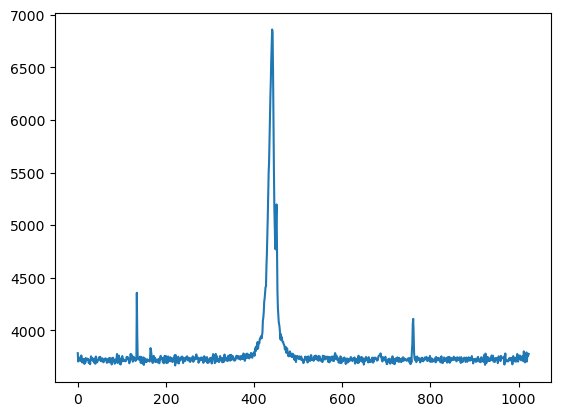

In [24]:
# and a slice in y

# plot the data
plt.plot(data[:,500])


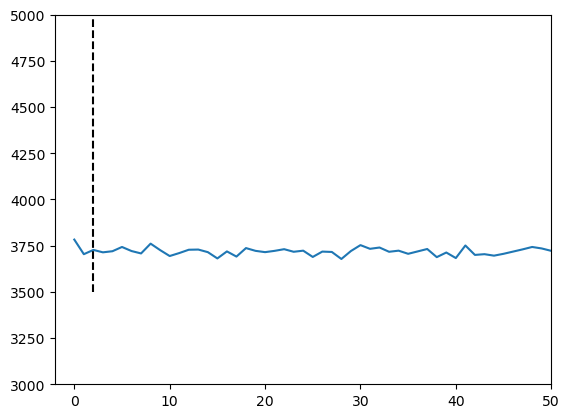

In [25]:
# y limits -- zooming in on the lower end

# plot the data
plt.plot(data[:,500])
plt.xlim([-2,50])
plt.ylim([3000,5000])

plt.plot([2,2], [3500,5000], color='black', linestyle='dashed')

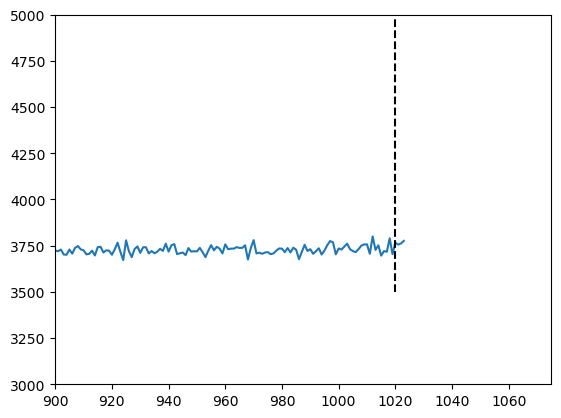

In [26]:
# y limits -- zooming in on the upper end

# plot the data
plt.plot(data[:,500])
plt.xlim([900,1075])
plt.ylim([3000,5000])

plt.plot([1020,1020], [3500,5000], color='black', linestyle='dashed')

In [27]:
x1 = 3     # first good pixel in x after trim
x2 = 1020  # last pixel to include in x after trim

y1 = 2     # first good pixel in y after trim
y2 = 1020  # last pixel to include in y after trim

bx1 = 1025 # first pixel of bias section
bx2 = 1054 # last pixel of bias section

ndata = data[y1:y2,x1:x2] #grabs the good section, but still need to subtract bias

In [28]:
# subtract bias
ndata_rm_bias = np.zeros(ndata.shape)

for y in range(y1,y2):
    ndata_rm_bias[y-y1,:] = ndata[y-y1,:] - np.median(data[y,bx1:bx2])

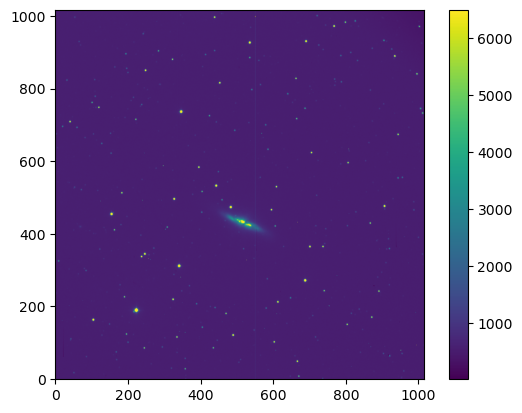

In [29]:
plt.imshow(ndata_rm_bias, origin='lower', vmax=6500)
plt.colorbar()

In [30]:
# alternative choice
# find the single value of the bias for every row in the image
row_bias = np.median(data[y1:y2,bx1:bx2], axis=1)
# reshape the array to be the same size as the image
bias = np.tile(row_bias[:,np.newaxis], (1, ndata.shape[1]))

# subtract the new array from the image
ndata_no_bias = ndata - bias

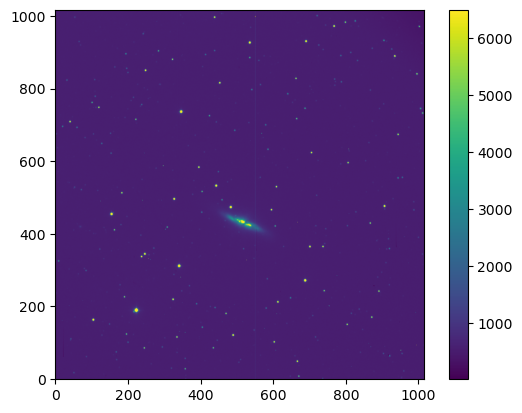

In [31]:
plt.imshow(ndata_no_bias, origin='lower', vmax=6500)
plt.colorbar()

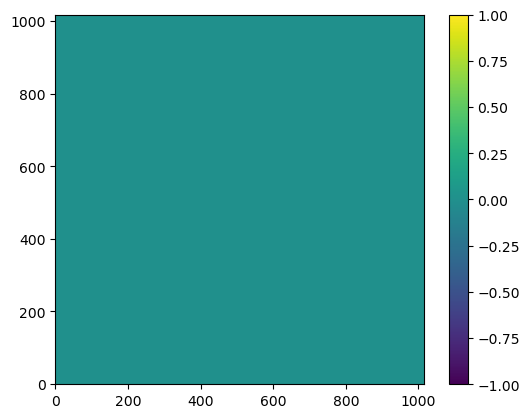

In [32]:
# Check the equivalence of two methods:

test = ndata_rm_bias - ndata_no_bias
np.nonzero(test) #returns a list with the indices of non-zero elements

plt.imshow(test, origin='lower', vmin=-1, vmax=1)
plt.colorbar()

In [33]:
np.array_equal(ndata_rm_bias,ndata_no_bias)

True

## Bias Frame

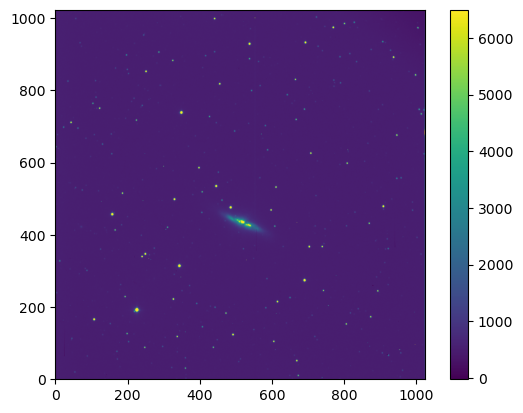

In [34]:
ndata_bias_frame = data - median_bias


plt.imshow(ndata_bias_frame[:,:1024], origin='lower', vmax=6500)
plt.colorbar()

## Dark

In [35]:
darks = glob.glob('/Users/wanyan/Desktop/Astro/229/M82/darks/*.fits')
darks

['/Users/wanyan/Desktop/Astro/229/M82/darks/obj0063.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/darks/obj0059.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/darks/obj0055.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/darks/obj0054.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/darks/obj0058.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/darks/obj0062.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/darks/obj0061.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/darks/obj0057.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/darks/obj0056.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/darks/obj0060.fits']

In [36]:
darks_frms = [fits.getdata(x) for x in darks]
mean_dark = np.mean(darks_frms, axis=0)
median_dark = np.median(darks_frms, axis=0)
stddev_dark = np.std(darks_frms, axis=0)
del darks_frms

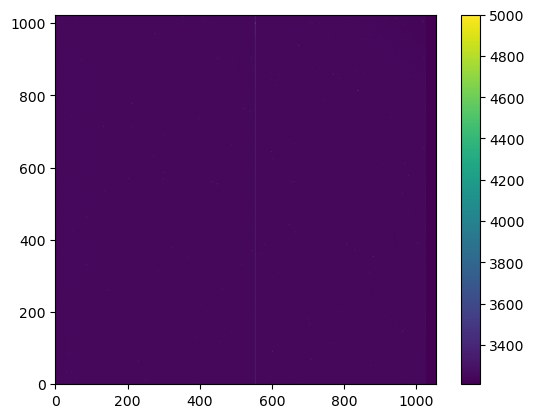

In [37]:
plt.imshow(mean_dark, origin='lower', vmax=5000)
plt.colorbar()

In [38]:
np.median(mean_dark)

3248.3

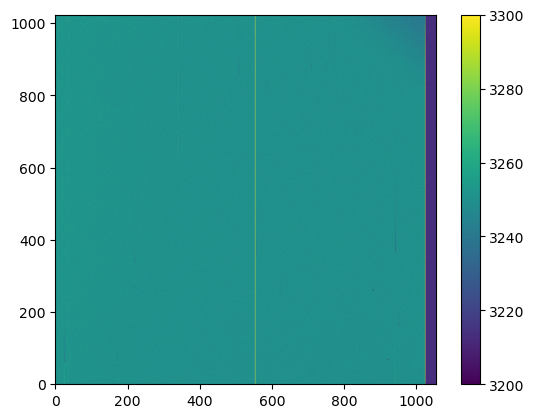

In [39]:
plt.imshow(median_dark, origin='lower', vmin=3200, vmax=3300)
plt.colorbar()

In [40]:
np.median(mean_bias)

3198.409090909091

In [41]:
diff = median_dark - median_bias
np.nanmedian(diff)

45.0

In [42]:
# No because dark frame already included the bias frame

## Flat Field

In [43]:
Vflats = glob.glob('/Users/wanyan/Desktop/Astro/229/M82/flats/V*.fits')
Vflats

['/Users/wanyan/Desktop/Astro/229/M82/flats/V_0001.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/flats/V_0000.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/flats/V_0007.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/flats/V_0006.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/flats/V_0010.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/flats/V_0005.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/flats/V_0009.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/flats/V_0008.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/flats/V_0004.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/flats/V_0003.fits',
 '/Users/wanyan/Desktop/Astro/229/M82/flats/V_0002.fits']

In [44]:
Vflat_timestream = [fits.getdata(x)for x in Vflats]
mean_Vflat = np.mean(Vflat_timestream, axis=0)
median_Vflat = np.median(Vflat_timestream, axis=0)
del Vflat_timestream

In [45]:
bias_subtracted_Vflat = median_Vflat - median_bias

In [46]:
Vflat_mean = np.mean(bias_subtracted_Vflat)# wait - didn't we already take the mean? Why is this mean different?
normalized_mean_Vflat = bias_subtracted_Vflat / Vflat_mean

In [47]:
np.mean(normalized_mean_Vflat)

1.0000000000000004

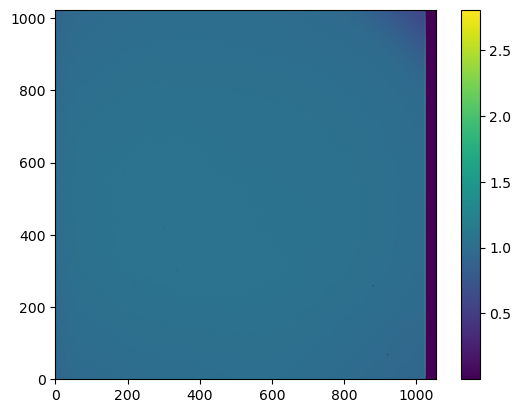

In [48]:
plt.imshow(normalized_mean_Vflat, origin='lower')
plt.colorbar()

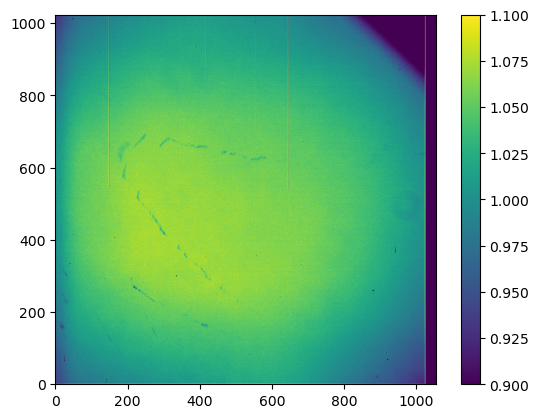

In [49]:
plt.imshow(normalized_mean_Vflat, origin='lower', vmin=0.9, vmax=1.1)
plt.colorbar()

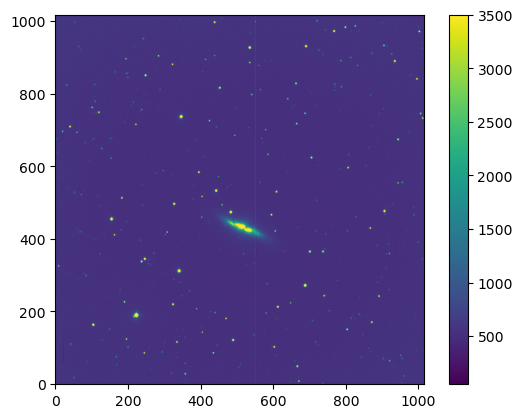

In [50]:
trimmed_Vflat = normalized_mean_Vflat[y1:y2,x1:x2]

ndata_ff = ndata_no_bias / trimmed_Vflat

plt.imshow(ndata_ff, origin='lower', vmin=50, vmax=3500)
plt.colorbar()

## The Header

In [51]:
nheader = header # copy the original header
nheader['BIASSEC'] = "["+str(bx1)+":"+str(bx2)+","+str(y1)+":"+str(y2)+"]"
nheader['TRIMSEC'] = "["+str(x1)+":"+str(x2)+","+str(y1)+":"+str(y2)+"]"

In [52]:
nheader

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1056 / Axis length                                    
NAXIS2  =                 1024 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
BSCALE  =           1.000000E0 / REAL = TAPE*BSCALE + BZERO                     
BZERO   =           3.276800E4 /                                                
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 1999' / FITS file originator        
DATE    = '2024-02-15T05:49:33' / Date FITS file was generated                  
IRAF-TLM= '2024-02-15T05:48:40' / Time of last modification                     
OBJECT  = 'M82     '           / Name of the object observed                    
OBSERVAT= 'MCDONALD         

In [53]:
# fits.writeto("/Users/wanyan/Desktop/Astro/229/M82/reduced/m82_V_ff.fits", ndata_ff, nheader, overwrite=True# )

## Processing the M82

In [54]:
# obj 65 is not applicable

base_path = '/Users/wanyan/Desktop/Astro/229/M82/'
obj_numbers = [i for i in range(59, 71) if i != 65]  # 59–70, excluding 65

data_dict = {}

for num in obj_numbers:
    filename = f'{base_path}obj00{num}.fits'
    with fits.open(filename) as hdul:
        data_dict[num] = hdul[0].data
        
# data_59 = data_dict[59]

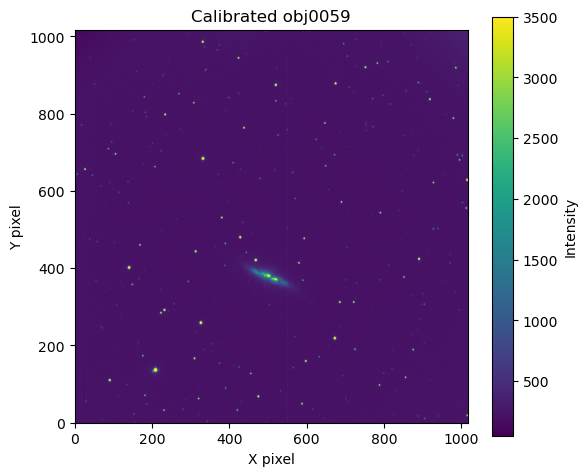

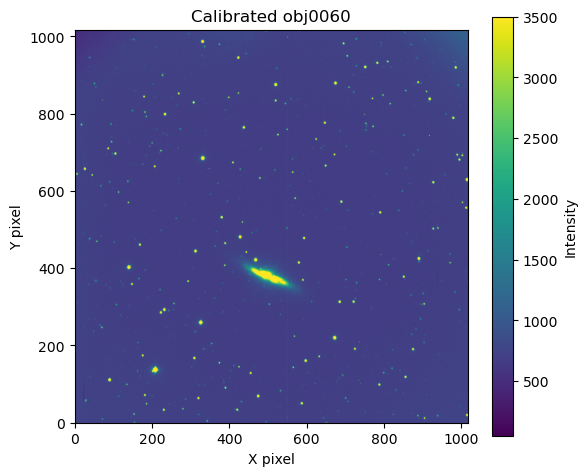

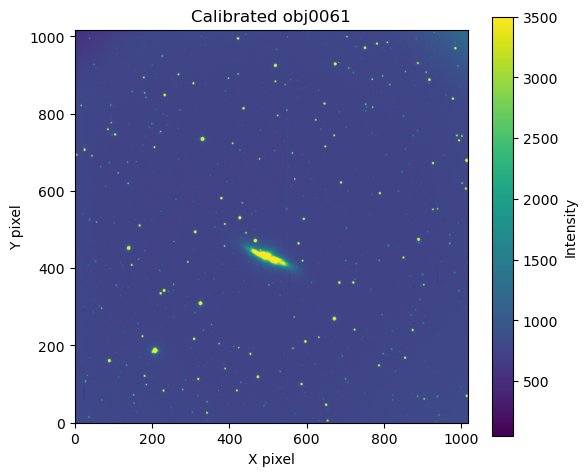

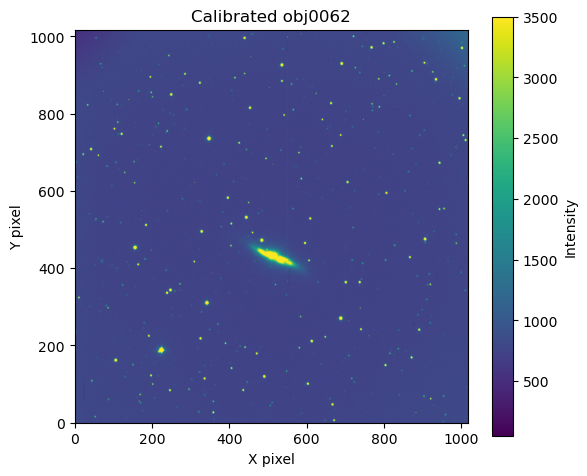

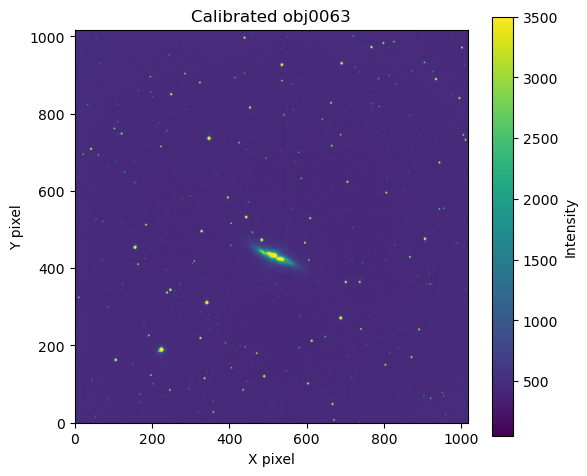

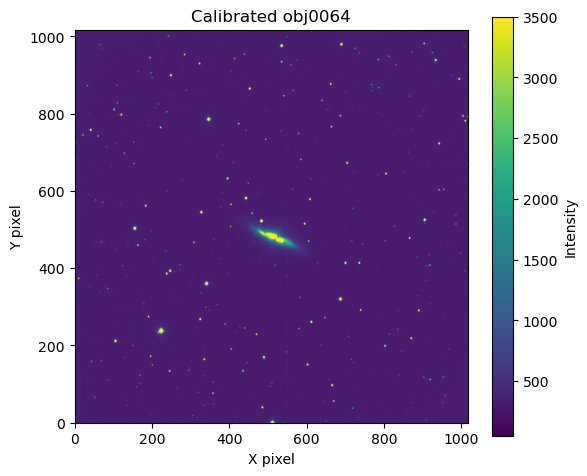

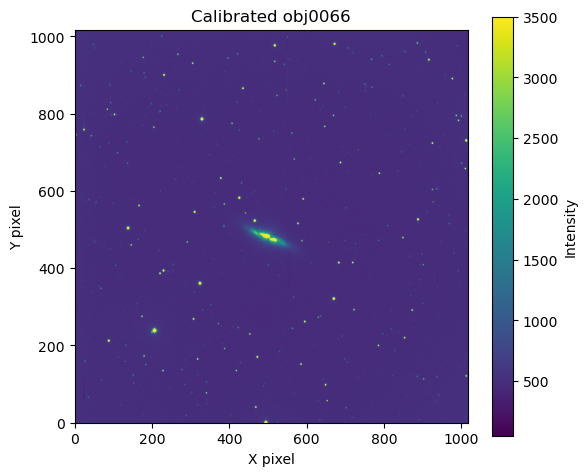

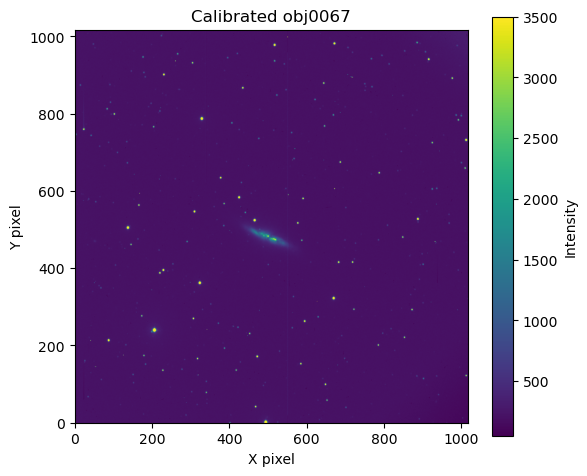

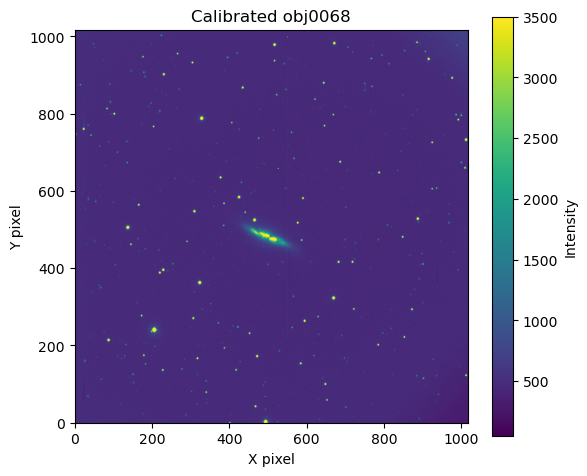

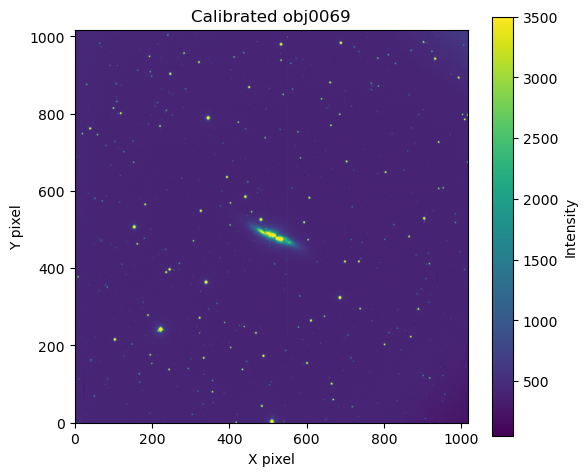

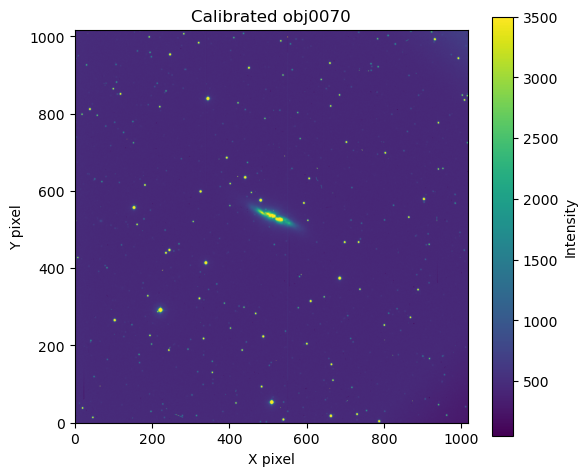

In [55]:
for num in obj_numbers:
    calibrated = (
        (data_dict[num][y1:y2,x1:x2] - mean_dark[y1:y2,x1:x2]) / trimmed_Vflat
    )

    # plot each calibrated frame
    plt.figure(figsize=(6, 5))
    plt.imshow(calibrated, origin='lower', vmin=50, vmax=3500)
    plt.colorbar(label='Intensity')
    plt.title(f'Calibrated obj00{num}')
    plt.xlabel('X pixel')
    plt.ylabel('Y pixel')
    plt.tight_layout()
    plt.show()

## For the Report

In [56]:
np.mean(ndata_no_bias)


578.0019820227063

In [57]:
np.mean(ndata_bias_frame[y1:y2,x1:x2])

543.0606356961131

=== Manual Sigma-Clipped Statistics ===
No bias subtraction:
    Mean   = 560.561
    Median = 554.000
    Std    = 83.234

Bias frame subtraction:
    Mean   = 512.238
    Median = 518.500
    Std    = 137.313

=== Difference Image (no_bias - bias_frame) ===
Mean   = 34.606
Median = 35.000
Std    = 5.606


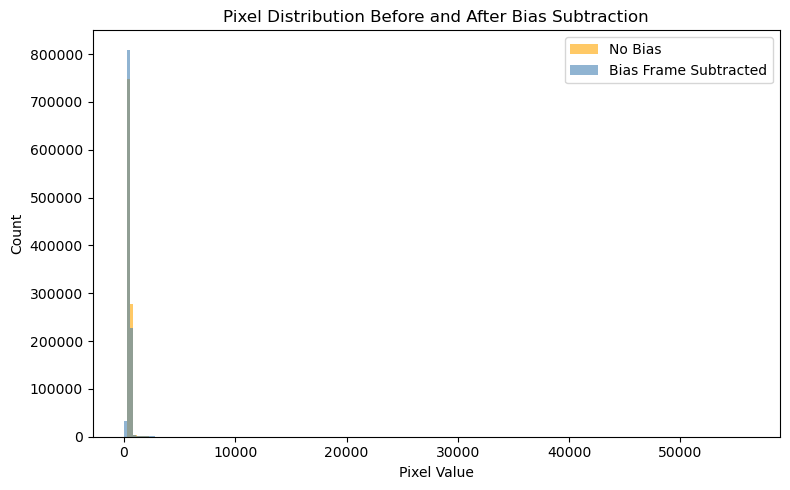

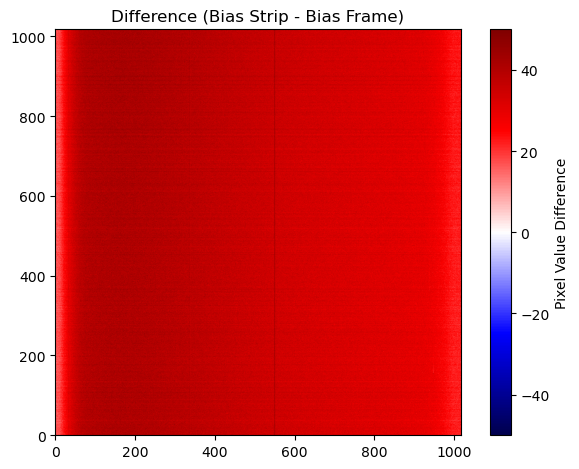

In [58]:


def manual_sigma_clipped_stats(data, sigma=3):
    # Flatten the image and remove NaN or Inf
    values = data[np.isfinite(data)].ravel()

    # Step 1: Compute initial mean and std
    mean_0 = np.mean(values)
    std_0 = np.std(values)

    # Step 2: Define clipping range
    lower_limit = mean_0 - sigma * std_0
    upper_limit = mean_0 + sigma * std_0

    # Step 3: Keep only values within that range
    clipped_values = values[(values > lower_limit) & (values < upper_limit)]

    # Step 4: Compute final statistics after clipping
    mean_final = np.mean(clipped_values)
    median_final = np.median(clipped_values)
    std_final = np.std(clipped_values)

    return mean_final, median_final, std_final


mean_no, median_no, std_no = manual_sigma_clipped_stats(ndata_no_bias)
mean_bias, median_bias, std_bias = manual_sigma_clipped_stats(ndata_bias_frame)

print("=== Manual Sigma-Clipped Statistics ===")
print(f"No bias subtraction:")
print(f"    Mean   = {mean_no:.3f}")
print(f"    Median = {median_no:.3f}")
print(f"    Std    = {std_no:.3f}\n")

print(f"Bias frame subtraction:")
print(f"    Mean   = {mean_bias:.3f}")
print(f"    Median = {median_bias:.3f}")
print(f"    Std    = {std_bias:.3f}\n")

diff = ndata_no_bias - ndata_bias_frame[y1:y2,x1:x2]
mean_diff, median_diff, std_diff = manual_sigma_clipped_stats(diff)

print("=== Difference Image (no_bias - bias_frame) ===")
print(f"Mean   = {mean_diff:.3f}")
print(f"Median = {median_diff:.3f}")
print(f"Std    = {std_diff:.3f}")

plt.figure(figsize=(8,5))
plt.hist(ndata_no_bias.ravel(), bins=200, alpha=0.6, label='No Bias', color='orange')
plt.hist(ndata_bias_frame.ravel(), bins=200, alpha=0.6, label='Bias Frame Subtracted', color='steelblue')
plt.xlabel('Pixel Value')
plt.ylabel('Count')
plt.title('Pixel Distribution Before and After Bias Subtraction')
plt.legend()
plt.tight_layout()
plt.show()


plt.imshow(diff, origin='lower', cmap='seismic', vmin=-50, vmax=50)
plt.title('Difference (Bias Strip - Bias Frame)')
plt.colorbar(label='Pixel Value Difference')
plt.tight_layout()
plt.show()


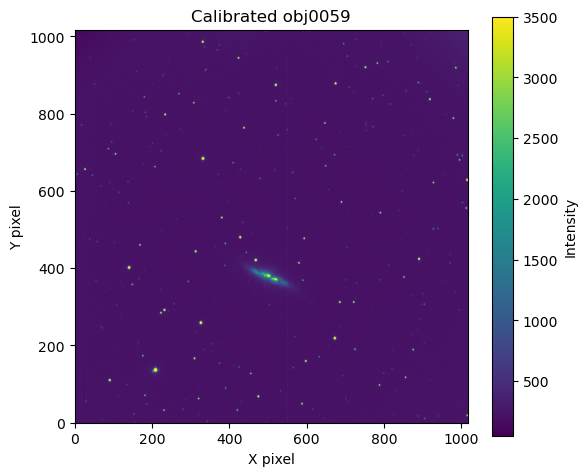

Saved calibrated file: /Users/wanyan/Desktop/Astro/229/M82/reduced/m82_V_59.fits


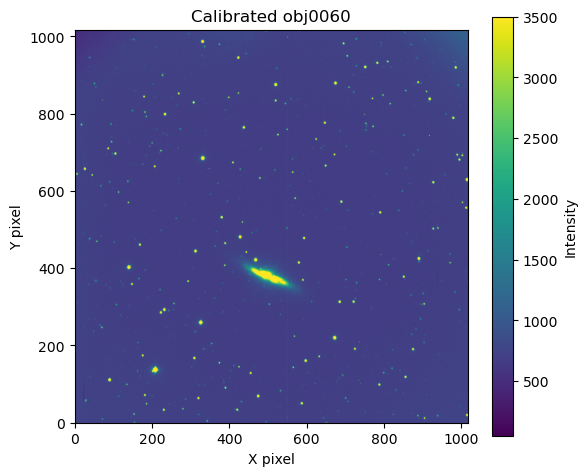

Saved calibrated file: /Users/wanyan/Desktop/Astro/229/M82/reduced/m82_V_60.fits


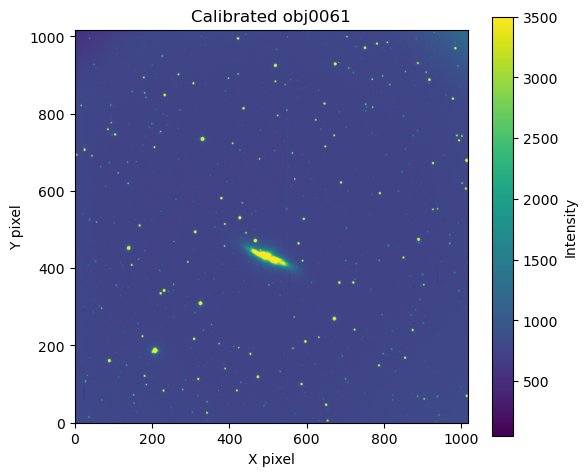

Saved calibrated file: /Users/wanyan/Desktop/Astro/229/M82/reduced/m82_V_61.fits


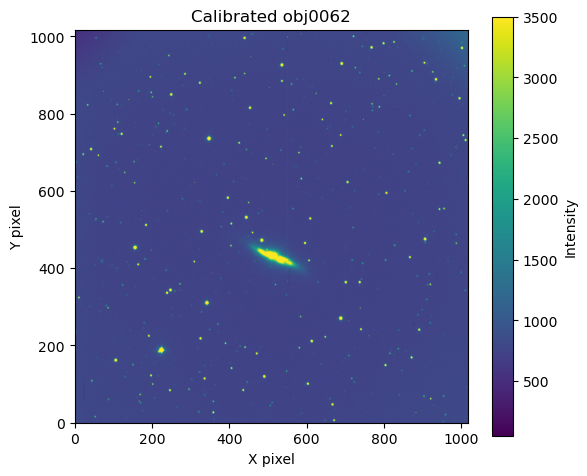

Saved calibrated file: /Users/wanyan/Desktop/Astro/229/M82/reduced/m82_V_62.fits


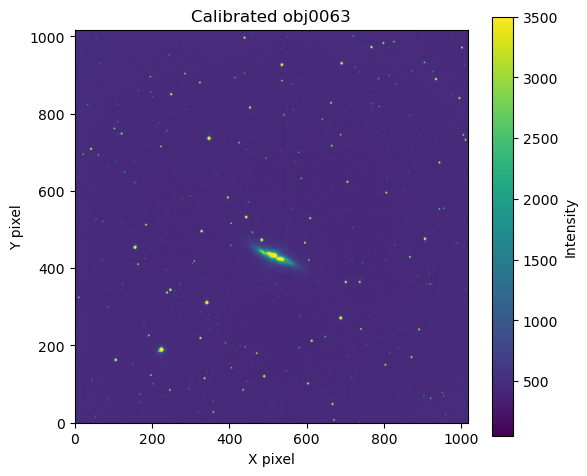

Saved calibrated file: /Users/wanyan/Desktop/Astro/229/M82/reduced/m82_V_63.fits


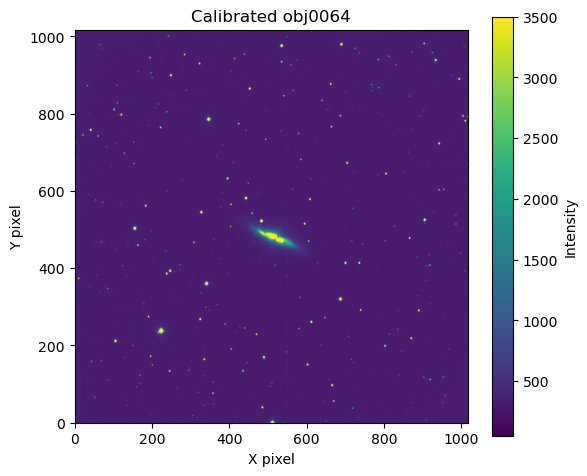

Saved calibrated file: /Users/wanyan/Desktop/Astro/229/M82/reduced/m82_V_64.fits


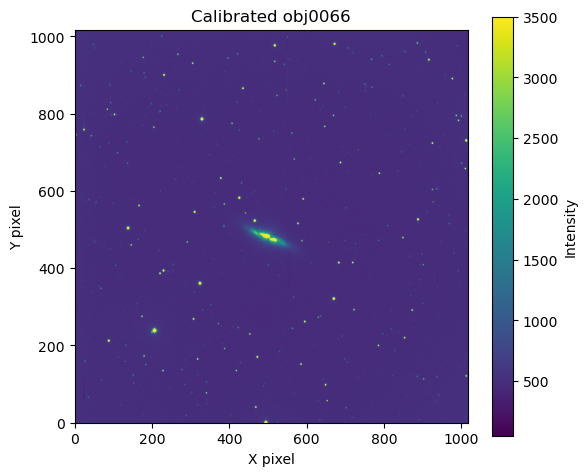

Saved calibrated file: /Users/wanyan/Desktop/Astro/229/M82/reduced/m82_V_66.fits


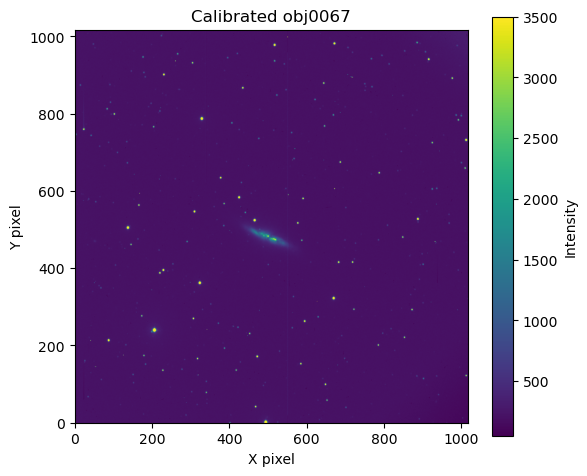

Saved calibrated file: /Users/wanyan/Desktop/Astro/229/M82/reduced/m82_V_67.fits


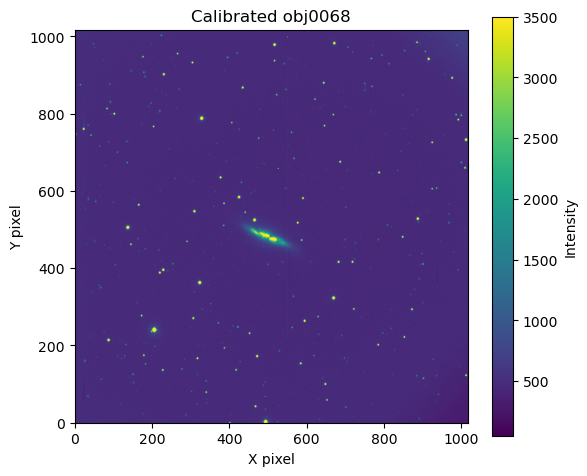

Saved calibrated file: /Users/wanyan/Desktop/Astro/229/M82/reduced/m82_V_68.fits


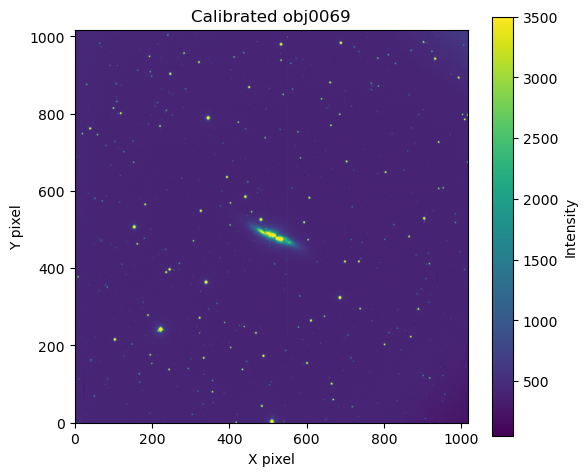

Saved calibrated file: /Users/wanyan/Desktop/Astro/229/M82/reduced/m82_V_69.fits


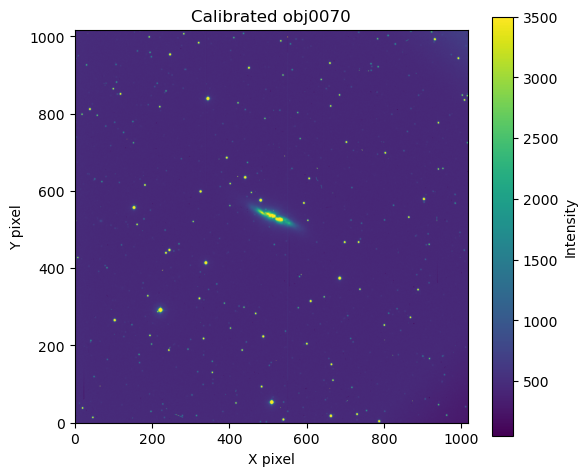

Saved calibrated file: /Users/wanyan/Desktop/Astro/229/M82/reduced/m82_V_70.fits


In [59]:
import os

base_path = '/Users/wanyan/Desktop/Astro/229/M82/'
save_path = os.path.join(base_path, 'reduced')
os.makedirs(save_path, exist_ok=True)

# Object numbers 59–70, excluding 65
obj_numbers = [i for i in range(59, 71) if i != 65]

data_dict = {}

# Load all object files
for num in obj_numbers:
    filename = f'{base_path}obj00{num}.fits'
    with fits.open(filename) as hdul:
        data_dict[num] = hdul[0].data
        header = hdul[0].header  # we’ll reuse this for saving later

# Calibrate and save each
for num in obj_numbers:
    # Perform calibration
    calibrated = (
        (data_dict[num][y1:y2, x1:x2] - mean_dark[y1:y2, x1:x2]) / trimmed_Vflat
    )

    # --- Plot ---
    plt.figure(figsize=(6, 5))
    plt.imshow(calibrated, origin='lower', vmin=50, vmax=3500)
    plt.colorbar(label='Intensity')
    plt.title(f'Calibrated obj00{num}')
    plt.xlabel('X pixel')
    plt.ylabel('Y pixel')
    plt.tight_layout()
    plt.show()

    # --- Save calibrated FITS file ---
    save_filename = os.path.join(save_path, f'm82_V_{num}.fits')
    fits.writeto(save_filename, calibrated, header, overwrite=True)

    print(f'Saved calibrated file: {save_filename}')